In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Telcom Data.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

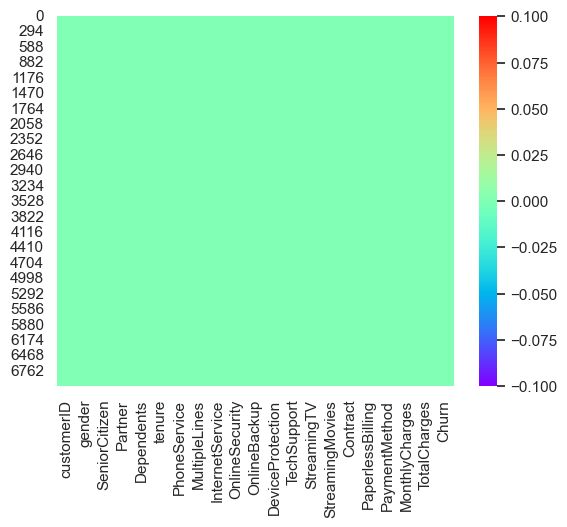

In [8]:
sns.heatmap(dataset.isnull(), cmap= 'rainbow')

In [9]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
dataset.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
dataset.describe(exclude='object')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
for i in dataset.columns:
    print('No. of unique values in', i, 'is', dataset[i].nunique())

No. of unique values in customerID is 7043
No. of unique values in gender is 2
No. of unique values in SeniorCitizen is 2
No. of unique values in Partner is 2
No. of unique values in Dependents is 2
No. of unique values in tenure is 73
No. of unique values in PhoneService is 2
No. of unique values in MultipleLines is 3
No. of unique values in InternetService is 3
No. of unique values in OnlineSecurity is 3
No. of unique values in OnlineBackup is 3
No. of unique values in DeviceProtection is 3
No. of unique values in TechSupport is 3
No. of unique values in StreamingTV is 3
No. of unique values in StreamingMovies is 3
No. of unique values in Contract is 3
No. of unique values in PaperlessBilling is 2
No. of unique values in PaymentMethod is 4
No. of unique values in MonthlyCharges is 1585
No. of unique values in TotalCharges is 6531
No. of unique values in Churn is 2


In [13]:
print('No. of customers churning :', dataset[dataset['Churn']=='Yes'].Churn.count())
churn_df =dataset[dataset['Churn']==1]
print('No of customer with InternetService :', dataset[dataset['InternetService']=='DSL']['InternetService'].count())
print('No. of customer with PayMethod is Electronic :',dataset[dataset['PaymentMethod']=='Electronic check'].count())
churn_df

No. of customers churning : 1869
No of customer with InternetService : 2421
No. of customer with PayMethod is Electronic : customerID          2365
gender              2365
SeniorCitizen       2365
Partner             2365
Dependents          2365
tenure              2365
PhoneService        2365
MultipleLines       2365
InternetService     2365
OnlineSecurity      2365
OnlineBackup        2365
DeviceProtection    2365
TechSupport         2365
StreamingTV         2365
StreamingMovies     2365
Contract            2365
PaperlessBilling    2365
PaymentMethod       2365
MonthlyCharges      2365
TotalCharges        2365
Churn               2365
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
churn_df1=dataset[dataset['Churn']==0]
churn_df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
dataset['Churn'] = dataset['Churn'].replace({'Yes':1,'No':0})

In [16]:
dataset['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [17]:
dataset.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


In [18]:
print('No. of customer with Senior Citizen :',dataset[dataset['SeniorCitizen']== 1].count())

No. of customer with Senior Citizen : customerID          1142
gender              1142
SeniorCitizen       1142
Partner             1142
Dependents          1142
tenure              1142
PhoneService        1142
MultipleLines       1142
InternetService     1142
OnlineSecurity      1142
OnlineBackup        1142
DeviceProtection    1142
TechSupport         1142
StreamingTV         1142
StreamingMovies     1142
Contract            1142
PaperlessBilling    1142
PaymentMethod       1142
MonthlyCharges      1142
TotalCharges        1142
Churn               1142
dtype: int64


In [19]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [20]:
dataset.drop('customerID', axis=1, inplace=True)

In [21]:
dataset.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [22]:
for i in dataset.columns:
    print('****'*4,i,'****'*4)
    print()
    print(set(dataset[i].tolist()))
    print()

**************** gender ****************

{'Male', 'Female'}

**************** SeniorCitizen ****************

{0, 1}

**************** Partner ****************

{'No', 'Yes'}

**************** Dependents ****************

{'No', 'Yes'}

**************** tenure ****************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}

**************** PhoneService ****************

{'No', 'Yes'}

**************** MultipleLines ****************

{'No', 'No phone service', 'Yes'}

**************** InternetService ****************

{'No', 'Fiber optic', 'DSL'}

**************** OnlineSecurity ****************

{'No', 'No internet service', 'Yes'}

**************** OnlineBackup ****************

{'No', 'No internet service', 'Yes'}

**************** DeviceProtection 

In [23]:
dataset.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
pd.to_numeric(dataset.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [25]:
dataset.shape

(7043, 20)

In [26]:
dataset.iloc[488].TotalCharges

' '

In [27]:
dataset[pd.to_numeric(dataset.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [28]:
dataset1 = dataset[dataset.TotalCharges !=' ']
print(dataset.shape)
print()
print(dataset1.shape)

(7043, 20)

(7032, 20)


In [29]:
(7043-7032)/7043*100

0.1561834445548772

In [30]:
pd.to_numeric(dataset1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [31]:
dataset1.TotalCharges = pd.to_numeric(dataset1.TotalCharges)

In [32]:
for i in dataset1.columns:
    print('****'*4,i,'****'*4)
    print()
    print(set(dataset1[i].tolist()))
    print()

**************** gender ****************

{'Male', 'Female'}

**************** SeniorCitizen ****************

{0, 1}

**************** Partner ****************

{'No', 'Yes'}

**************** Dependents ****************

{'No', 'Yes'}

**************** tenure ****************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}

**************** PhoneService ****************

{'No', 'Yes'}

**************** MultipleLines ****************

{'No', 'No phone service', 'Yes'}

**************** InternetService ****************

{'No', 'Fiber optic', 'DSL'}

**************** OnlineSecurity ****************

{'No', 'No internet service', 'Yes'}

**************** OnlineBackup ****************

{'No', 'No internet service', 'Yes'}

**************** DeviceProtection ***

In [33]:
# another method to handle empty rows in a column
# dataset1.TechSupport.mode()
# dataset1.TechSupport = np.where(dataset1.TechSupport == ' ','No'.dataset1.TechSupport)

In [34]:
dataset1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [35]:
dataset1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
dataset1.gender.value_counts

<bound method IndexOpsMixin.value_counts of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object>

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

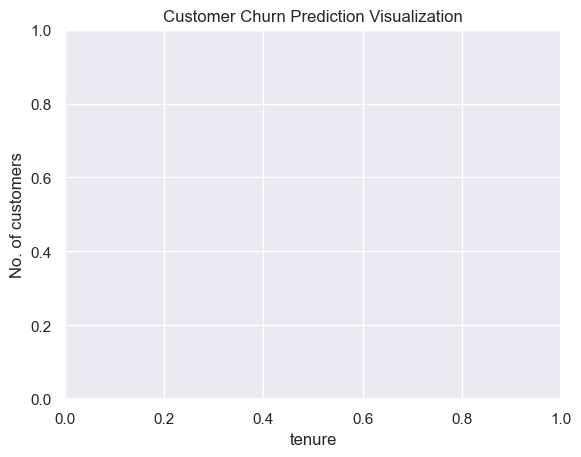

In [37]:
churn_no = dataset1[dataset1.Churn == 0].tenure
churn_yes = dataset1[dataset1.Churn==1].tenure

plt.xlabel('tenure')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction Visualization')


In [38]:
churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [39]:
dataset1.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [40]:
dataset1.tenure.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64>

In [41]:
# Encoding required - One Hot Encoding + dummy variable

dataset1 = pd.get_dummies(dataset1, columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
                                             'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                             'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'], 
                          drop_first=True)

In [42]:
dataset1.shape

(7032, 31)

In [43]:
dataset1.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [44]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [45]:
dataset1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['tenure','MonthlyCharges','TotalCharges']
dataset1[scaler_columns] = scaler.fit_transform(dataset1[scaler_columns])

In [47]:
dataset1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0.064303,-0.260878,-0.173740,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.512486,-0.747850,-0.195248,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.239504,0.196178,-0.940457,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.343137,0.664868,-0.129180,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1.612573,1.276493,2.241056,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,-0.872808,-1.170004,-0.854514,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,-1.158016,0.319168,-0.872095,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [48]:
dataset1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16,0.265785,0.504693,0.482509,0.298493,0.903299,0.096701,...,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00,0.441782,0.500014,0.499729,0.457629,0.295571,0.295571,...,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# split the data into x and y (ind and dep varible)
x = dataset1.drop(['Churn'],axis=1)
y = dataset1[['Churn']]

In [50]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.064303,-0.260878,-0.173740,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.239504,-0.363923,-0.959649,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.512486,-0.747850,-0.195248,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.239504,0.196178,-0.940457,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [52]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [53]:
y.value_counts()

Churn
0        5163
1        1869
dtype: int64

In [54]:
!pip install imblearn

In [55]:
# Balance the dataset

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Churn
0        5163
1        1869
dtype: int64

Churn
0        5163
1        5163
dtype: int64


In [56]:
!pip install dtale

# EDA Part

In [57]:
import dtale
dtale.show(dataset1)

In [60]:
!pip install pandas_profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.



                                              0.0/262.6 kB ? eta -:--:--
                                              0.0/262.6 kB ? eta -:--:--
                                              0.0/262.6 kB ? eta -:--:--
     -                                        10.2/262.6 kB ? eta -:--:--
     ----                                  30.7/262.6 kB 330.3 kB/s eta 0:00:01
     --------                              61.4/262.6 kB 363.1 kB/s eta 0:00:01
     ----------                            71.7/262.6 kB 357.2 kB/s eta 0:00:01
     ---------------                      112.6/262.6 kB 385.0 kB/s eta 0:00:01
     ---------------                      112.6/262.6 kB 385.0 kB/s eta 0:00:01
     -------------------                  143.4/262.6 kB 355.0 kB/s eta 0:00:01
     ---------------------                153.6/262.6 kB 339.7 kB/s eta 0:00:01
     --------------------------           194.6/262.6 kB 380.8 kB/s eta 0:00:01
     ------------------------------       225.3/262.6 kB 393.1 kB/

In [69]:
!pip install pydantic

In [71]:
from pydantic import BaseSettings
from pandas_profiling import ProfileReport
report = ProfileReport(dataset1)
report.to_file(output_file='report.html')

In [72]:
# split the data into training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.25, random_state=42)

In [74]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(7744, 30) (2582, 30) (7744, 1) (2582, 1)


# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [77]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [79]:
# Evaluation matrix
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [81]:
print(confusion_matrix(y_train,y_pred_rf_train))
print()
print(confusion_matrix(y_test,y_pred_rf_test))

[[3854    5]
 [   2 3883]]

[[1050  254]
 [ 168 1110]]


In [83]:
print(classification_report(y_train,y_pred_rf_train))
print()
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00      3885

    accuracy                           1.00      7744
   macro avg       1.00      1.00      1.00      7744
weighted avg       1.00      1.00      1.00      7744


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1304
           1       0.81      0.87      0.84      1278

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



In [84]:
print('Training Accuracy:', accuracy_score(y_train,y_pred_rf_train))
print()
print('Testing Accuracy:', accuracy_score(y_test,y_pred_rf_test))

Training Accuracy: 0.9990960743801653

Testing Accuracy: 0.836560805577072


In [85]:
# cross validation - K_Fold method

from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf,x_train,y_train,cv=10)
print(training_accuracy)
print()
print(training_accuracy.mean())
print()
print(training_accuracy.max())

[0.85677419 0.83354839 0.83870968 0.84774194 0.85400517 0.82170543
 0.81136951 0.81912145 0.81782946 0.86563307]

0.8366438276235725

0.8656330749354005


In [87]:
# XGBoost method

from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test= xgb.predict(x_test)

In [90]:
print('Training Accuracy :',accuracy_score(y_train,y_pred_xgb_train))
print()
print('Test Accuracy :', accuracy_score(y_test,y_pred_xgb_test))

Training Accuracy : 0.9466683884297521

Test Accuracy : 0.8292021688613478


In [92]:
# cross validation  - K_Fold method
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb,x_train,y_train,cv=10)
print(training_accuracy)
print()
print(training_accuracy.mean())
print()
print(training_accuracy.max())     

[0.83483871 0.83225806 0.82322581 0.83612903 0.82428941 0.81912145
 0.8126615  0.82299742 0.80620155 0.84625323]

0.8257976160706842

0.8462532299741602


2024-01-22 17:19:19,748 - INFO     - Executing shutdown due to inactivity...
2024-01-22 17:19:32,043 - INFO     - Executing shutdown...
2024-01-22 17:19:32,048 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [95]:
x_train.shape

(7744, 30)

In [ ]:
# high bias go by XGBoost and high variance go by random forest 

# boosting can handle high bias problem and bagging can handle high variance problem
# bagging is  a parllel alogrithm and boosting is a sequenical algorithm

# Deep learning Method - MultiLayerPreception Method/ DNN/ ANN

In [94]:
!pip install tensorflow


                                              0.0/300.9 MB ? eta -:--:--
                                              0.0/300.9 MB ? eta -:--:--
                                              0.0/300.9 MB ? eta -:--:--
                                              0.0/300.9 MB ? eta -:--:--
                                            0.0/300.9 MB 262.6 kB/s eta 0:19:06
                                            0.0/300.9 MB 245.8 kB/s eta 0:20:25
                                            0.0/300.9 MB 245.8 kB/s eta 0:20:25
                                            0.0/300.9 MB 245.8 kB/s eta 0:20:25
                                            0.1/300.9 MB 269.5 kB/s eta 0:18:37
                                            0.1/300.9 MB 269.5 kB/s eta 0:18:37
                                            0.1/300.9 MB 218.5 kB/s eta 0:22:58
                                            0.1/300.9 MB 233.8 kB/s eta 0:21:27
                                            0.1/300.9 MB 240.2 kB/s

In [99]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

import warnings
warnings.filterwarnings('ignore')

In [104]:
model = Sequential()
model.add(Dense(26, activation = 'relu', input_dim=30))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/100


2024-01-22 17:39:58,778 - WARNING  - From C:\Users\Bulla Triratna\anaconda3\Lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.

2024-01-22 17:40:00,124 - WARNING  - From C:\Users\Bulla Triratna\anaconda3\Lib\site-packages\keras\src\engine\base_layer_utils.py:384: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.



242/242 [==============================] - 7s 12ms/step - loss: 0.5620 - accuracy: 0.7021 - val_loss: 0.4828 - val_accuracy: 0.7723
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4708 - accuracy: 0.7708 - val_loss: 0.4660 - val_accuracy: 0.7808
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4546 - accuracy: 0.7819 - val_loss: 0.4551 - val_accuracy: 0.7866
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4461 - accuracy: 0.7890 - val_loss: 0.4518 - val_accuracy: 0.7924
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 0.4402 - accuracy: 0.7931 - val_loss: 0.4492 - val_accuracy: 0.7955
Epoch 6/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4363 - accuracy: 0.7957 - val_loss: 0.4477 - val_accuracy: 0.7920
Epoch 7/100
242/242 [==============================] - 2s 8ms/step - loss: 0.4317 - accuracy: 0.8002 - val_loss: 0.4438 - val_accuracy: 0.7924
Epoch 8/10

Epoch 58/100
242/242 [==============================] - 3s 11ms/step - loss: 0.3679 - accuracy: 0.8369 - val_loss: 0.4296 - val_accuracy: 0.8079
Epoch 59/100
242/242 [==============================] - 2s 9ms/step - loss: 0.3674 - accuracy: 0.8363 - val_loss: 0.4303 - val_accuracy: 0.8067
Epoch 60/100
242/242 [==============================] - 2s 10ms/step - loss: 0.3655 - accuracy: 0.8387 - val_loss: 0.4270 - val_accuracy: 0.8102
Epoch 61/100
242/242 [==============================] - 3s 11ms/step - loss: 0.3655 - accuracy: 0.8368 - val_loss: 0.4312 - val_accuracy: 0.8060
Epoch 62/100
242/242 [==============================] - 2s 10ms/step - loss: 0.3644 - accuracy: 0.8407 - val_loss: 0.4361 - val_accuracy: 0.8021
Epoch 63/100
242/242 [==============================] - 2s 10ms/step - loss: 0.3646 - accuracy: 0.8385 - val_loss: 0.4420 - val_accuracy: 0.7955
Epoch 64/100
242/242 [==============================] - 2s 9ms/step - loss: 0.3619 - accuracy: 0.8396 - val_loss: 0.4314 - val_accu